In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Modeling

## 데이터 수집

In [2]:
df = pd.read_csv("C:/workspaces/project/kaggle/data/d_final.csv")

In [3]:
df.head()

,id,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,DEATH,d_ent,d_sym,d_last,diff_days,age_grp
0,167386,1,2,2,54,2,2,2,2,2,...,2,3,1,2,0,2020-04-06,2020-04-01,2020-06-29,89,3.0
1,0b5948,2,2,1,30,2,2,2,2,2,...,2,3,1,2,0,2020-04-17,2020-04-10,2020-06-29,80,2.0
2,0d01b5,1,2,2,60,2,1,2,2,2,...,2,3,1,2,1,2020-04-13,2020-04-13,2020-04-22,9,4.0
3,1beec8,2,2,1,47,2,1,2,2,2,...,2,3,1,1,1,2020-04-16,2020-04-16,2020-04-29,13,3.0
4,1.75E+56,2,2,2,63,2,2,2,2,2,...,2,3,1,2,0,2020-04-22,2020-04-13,2020-06-29,77,4.0


In [4]:
df.describe()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,obesity,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu,DEATH,diff_days,age_grp
count,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,...,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000
mean,1.599374,1.919198,1.394950,52.957577,1.992561,1.714560,1.959776,1.979027,1.966770,1.674105,...,1.799275,1.953655,1.945583,1.917081,2.367676,1.557519,1.917987,0.266914,32.845092,3.187380
std,0.490027,0.276166,0.488859,19.237785,0.100507,0.463632,0.219534,0.173651,0.208078,0.479277,...,0.413378,0.234145,0.247939,0.294203,0.718388,0.694507,0.278025,0.442349,27.360004,0.970514
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,42.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,11.000000,3.000000
50%,2.000000,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,0.000000,24.000000,3.000000
75%,2.000000,2.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,49.000000,4.000000
max,2.000000,3.000000,3.000000,118.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,180.000000,5.000000


## 변수 설정 

In [5]:
X = df.loc[:, ['sex', 'intubed','age_grp','pneumonia','pregnancy', 
               'diabetes', 'copd', 'asthma','inmsupr','hypertension',
               'other_disease','cardiovascular','obesity', 'renal_chronic', 
               'tobacco', 'contact_other_covid', 'covid_res', 'icu']]
Y = df.loc[:, ['DEATH']]

## 정규화

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
t_train_raw = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

In [8]:
t_train_raw

array([[0.  , 0.5 , 0.5 , ..., 1.  , 0.  , 0.5 ],
       [1.  , 0.5 , 0.25, ..., 1.  , 0.  , 0.5 ],
       [0.  , 0.5 , 0.75, ..., 1.  , 0.  , 0.5 ],
       ...,
       [1.  , 0.  , 0.5 , ..., 0.5 , 1.  , 0.  ],
       [0.  , 0.5 , 0.25, ..., 1.  , 1.  , 0.5 ],
       [0.  , 0.5 , 0.5 , ..., 1.  , 1.  , 0.5 ]])

##### train/test 데이터 셋 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1004)

In [11]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(97116, 18) (24279, 18) (97116, 1) (24279, 1)


---
---
---
---
---

## Random Forest

In [12]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

C:\Users\u\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

##### 정확도 구하기

In [14]:
print("[accuarcy]")
print("train : {:.3f}".format(rf.score(x_train,y_train)))
print("test  : {:.3f}".format(rf.score(x_test,y_test)))

[accuarcy]
train : 0.807
test  : 0.757


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
Y_pred = rf.predict(x_test)

In [17]:
probs=rf.predict_proba(x_test)

In [18]:
probs = probs[:,1]

##### ROC 그래프

In [19]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, auc

In [20]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classification - Random Forest Model')
    plt.legend()
    plt.show()

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

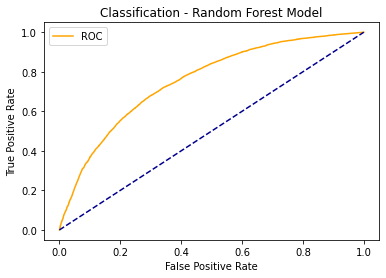

In [22]:
plot_roc_curve(fpr,tpr)

##### AUC 구하기

In [23]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.754


In [24]:
Y_test2 = y_test.loc[:, "DEATH"]

In [25]:
print('accuracy : %.3f' % accuracy_score(y_true = Y_test2, y_pred = Y_pred))
print('recall : %.3f' % recall_score(y_true = Y_test2, y_pred = Y_pred))
print('f1_score : %.3f' % f1_score(y_true = Y_test2, y_pred = Y_pred))

accuracy : 0.757
recall : 0.350
f1_score : 0.435


##### 특성 중요도 구하기 

In [26]:
print("[특성 중요도]")
print("{}".format(rf.feature_importances_))

[특성 중요도]
[0.03497256 0.11583748 0.16141826 0.07714751 0.00417469 0.03873851
 0.02605061 0.01693213 0.0254999  0.03891832 0.03167237 0.03043974
 0.04493555 0.02683629 0.03557124 0.11000195 0.15145507 0.02939783]


## 시각화

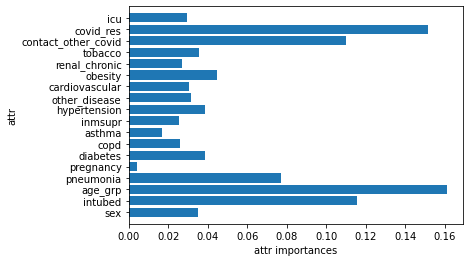

In [27]:
def plot_feature_importances_df(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    
plt.show()    

plot_feature_importances_df(rf)

##### TPR, FPR export (나중에 그래프 그릴 때 사용)

In [28]:
d_tpr = pd.DataFrame({'tpr':tpr})
d_fpr = pd.DataFrame({'fpr':fpr})

In [29]:
clf_rf = pd.concat([d_tpr, d_fpr], axis = 1)
clf_rf

,tpr,fpr
0,0.000000,0.000000
1,0.004918,0.001238
2,0.005071,0.001294
3,0.005840,0.001294
4,0.006147,0.001294
...,...,...
4033,0.988474,0.912053
4034,0.988474,0.912165
4035,0.988474,0.912447
4036,0.988474,0.912672


In [30]:
clf_rf.to_csv('C:/workspaces/project/kaggle/result/clf_rf.csv', encoding='utf-8', index=False, line_terminator='\n')